In [ ]:
import random

import numpy as np
from scipy import signal, fft
from scipy.io import loadmat

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [ ]:
random.seed(42)
np.random.seed(42)

In [ ]:
def draw_graphic(x: np.array, y: np.array, ax, title="", label="", xlabel="", ylabel="", xlim=None, ylim=None, grid=False, color=None):
    ax.plot(x, y, label=label, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if not xlim is None:
        ax.set_xlim(xlim[0], xlim[1])
    if not ylim is None:
        ax.set_ylim(ylim[0], ylim[1]) 

    if grid:
        ax.grid()
    
    if len(label) > 0:
        ax.legend()

    return ax

# Task 1

Определяем вейвлет Морле 

In [ ]:
def wavelet_morle(x: np.array, alpha: float, freq=1.0) -> np.array:
    return np.exp(-x**2 / alpha**2) * np.exp(1j * 2 * np.pi * x * freq)

sample_rate = 1000

x = np.arange(-6, 6, 1 / sample_rate)
morle = wavelet_morle(x, 1)

N = x.shape[0]

Находим спектр вейвлета Морле

In [ ]:
f_morle = fft.fft(morle)
ff_morle = np.abs(f_morle)[:N//2]

xf = fft.fftfreq(N, 1 / sample_rate)
xff = xf[:N//2]

Выводим графики вейвлета Морле и его спектра

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


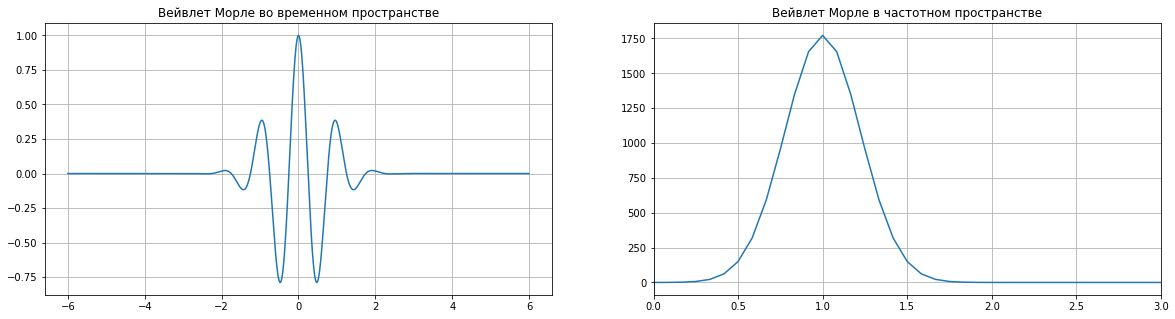

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(x, morle, ax1, grid=True, title="Вейвлет Морле во временном пространстве")
draw_graphic(xff, ff_morle, ax2, grid=True, title="Вейвлет Морле в частотном пространстве", xlim=(0, 3))

plt.show()

# Task 2

ОПределяем вейвлет "Мексиканская шляпа"

In [ ]:
def wavelet_mexican_hat(x: np.array, b: float) -> np.array:
    return (1 - (x - b)**2) * np.exp(-(x - b)**2 / 2)

mexican_hat = wavelet_mexican_hat(x, 0)

Находим спектр вейвлета "Мексиканская шляпа"

In [ ]:
f_mexican_hat = fft.fft(mexican_hat)
ff_mexican_hat = np.abs(f_mexican_hat)[:N//2]

Выводим графики вейвлета "Мексиканская шляпа" и его спектра

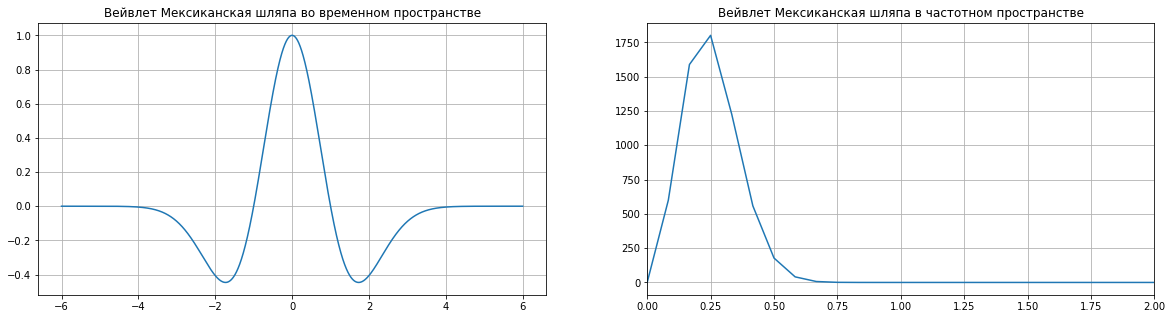

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(x, mexican_hat, ax1, grid=True, title="Вейвлет Мексиканская шляпа во временном пространстве")
draw_graphic(xff, ff_mexican_hat, ax2, grid=True, title="Вейвлет Мексиканская шляпа в частотном пространстве", xlim=(0, 2))

plt.show()

# Text 3

Определяем вейвлет Хаара

In [ ]:
def wavelet_haar(x, T, A):
    out = np.zeros_like(x)
    out = np.where((0 <= x) & (x < T / 2), A, out)
    out = np.where((T / 2 <= x) & (x < T), -A, out)

    return out

haar = wavelet_haar(x, 1, 1)

Находим спектр вейвлета Хаара

In [ ]:
f_haar = fft.fft(haar)
ff_haar = np.abs(f_haar)[:N//2]

Выводим графики вейвлета Хаара и его спектра

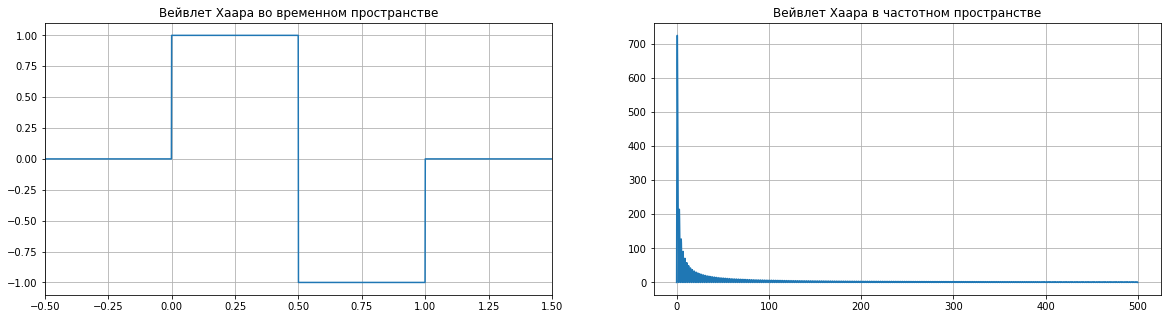

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

draw_graphic(x, haar, ax1, grid=True, title="Вейвлет Хаара во временном пространстве", xlim=(-0.5, 1.5))
draw_graphic(xff, ff_haar, ax2, grid=True, title="Вейвлет Хаара в частотном пространстве")

plt.show()

# Task 4

Определяем зашумленный сигнал

In [ ]:
np.random.seed(42)

p = 15
signal = np.interp(np.linspace(0, p, N), np.arange(0, p), np.random.rand(p) * 30)
noise = 5 * np.random.randn(N)
noisy_signal = signal + noise
noisy_signal -= noisy_signal.mean()

Выводим получившийся сигнал

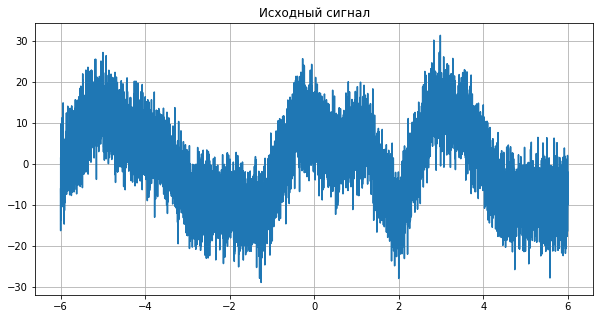

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

draw_graphic(x, noisy_signal, ax1, grid=True, title="Исходный сигнал")

plt.show()

Производим свертку с выше определенными вейвлетами

In [ ]:
morle_filtered = np.convolve(noisy_signal, np.abs(morle), mode="same")
mexican_hat_filtered = np.convolve(noisy_signal, mexican_hat, mode="same")
haar_filtered = np.convolve(noisy_signal, haar, mode="same")

Выводим графики зашумленного и отфильтрованного сигналов для каждого вейвлета

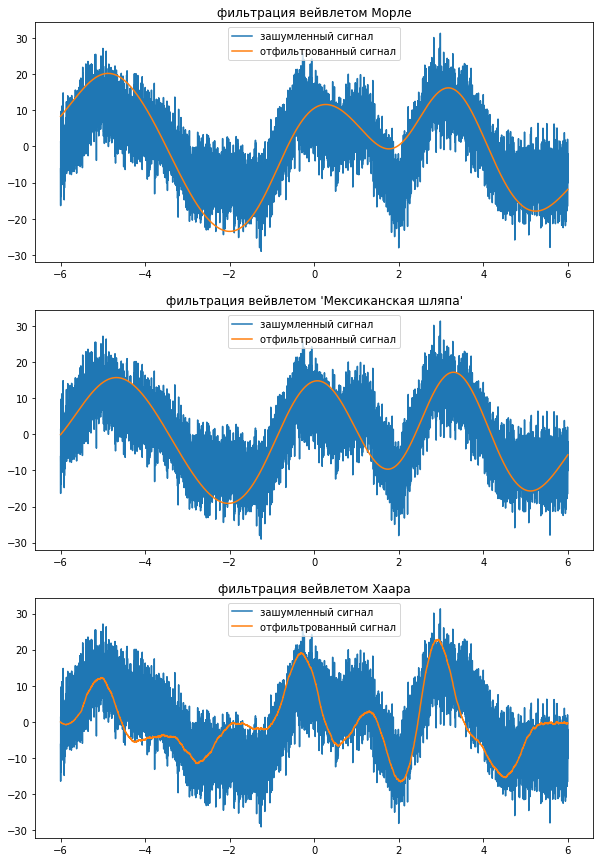

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

draw_graphic(x, noisy_signal, ax1, grid=True, label="зашумленный сигнал")
draw_graphic(x, morle_filtered / N * 18, ax1, grid=True, label="отфильтрованный сигнал", title="фильтрация вейвлетом Морле")

draw_graphic(x, noisy_signal, ax2, grid=True, label="зашумленный сигнал")
draw_graphic(x, mexican_hat_filtered / N * 12, ax2, grid=True, label="отфильтрованный сигнал", title="фильтрация вейвлетом 'Мексиканская шляпа'")

draw_graphic(x, noisy_signal, ax3, grid=True, label="зашумленный сигнал")
draw_graphic(x, haar_filtered / N * 32, ax3, grid=True, label="отфильтрованный сигнал", title="фильтрация вейвлетом Хаара")

plt.show()

Вейвлету Морле удается лучше отфильтровывать низкочастотный сигнал, но обладает проблемами с высокочастотными сигналами

Вейвлету Хаара удается лучше других вейвлетов отфильтровать высокочастотные сигналы, но с низкими частотами справляется хуже

Вейвлет "Мексиканская Шляпа" по качеству фильтрации и особенностям является нечто средним между Вейвлетами Морле и Хаара 

# Task 5

Задачем сигнал, частота которого изменяется со временем

In [ ]:
srate = 1000
time = np.arange(-3, 3, 1 / srate)
n_points = len(time)

freqmod = np.exp(-time**2) * 10 + 10
freqmod += np.linspace(0, 10, n_points)

sig = np.sin(2*np.pi * (time + np.cumsum(freqmod) / srate))

Выводим получившийся сигнал

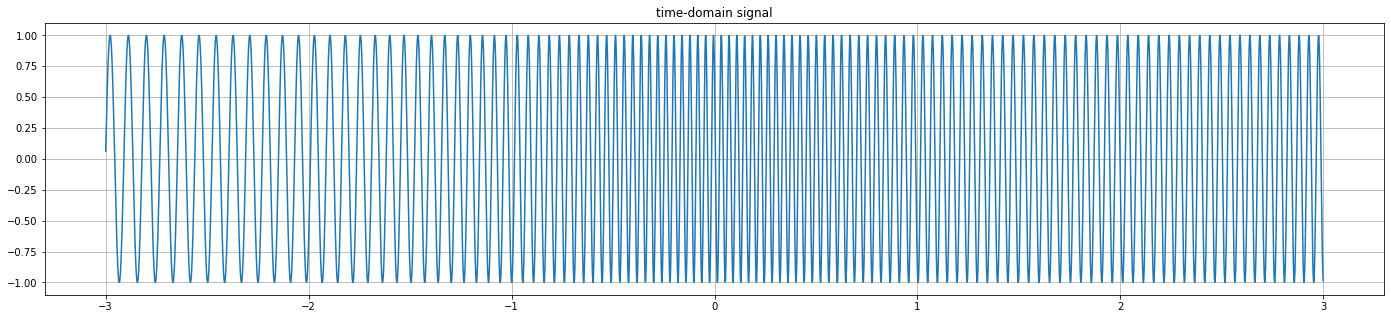

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(24, 5))

draw_graphic(time, sig, ax1, grid=True, title="time-domain signal")

plt.show()

Задаем частоты и параметры вейвлета Морле

In [ ]:
n_freqs = 50
freqs = np.linspace(3, 35, n_freqs)
fwhm = 0.2

Создаем семейство вейвлетов морле

In [ ]:
wavelets = np.zeros((n_freqs, n_points), dtype=np.complex128)

for i, freq in enumerate(freqs):
    morle = wavelet_morle(time, fwhm, freq)
    wavelets[i] += morle

производим свертку сигнала с получившимися вейвлетами

In [ ]:
yf_sig = fft.fft(sig)

tf = np.zeros((n_freqs, n_points), dtype=np.complex128)

halfk = n_points // 2 + 1
for i, wavelet in enumerate(wavelets):
    yf_wave = fft.fft(wavelet)
    yf_wave /= yf_wave.max()

    conv_result = fft.ifft(yf_wave * yf_sig)
    conv_result = np.concatenate([conv_result[halfk:], conv_result[:halfk]])

    tf[i] += np.abs(conv_result) ** 2

Выводим спектрограмму сигнала

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2830: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


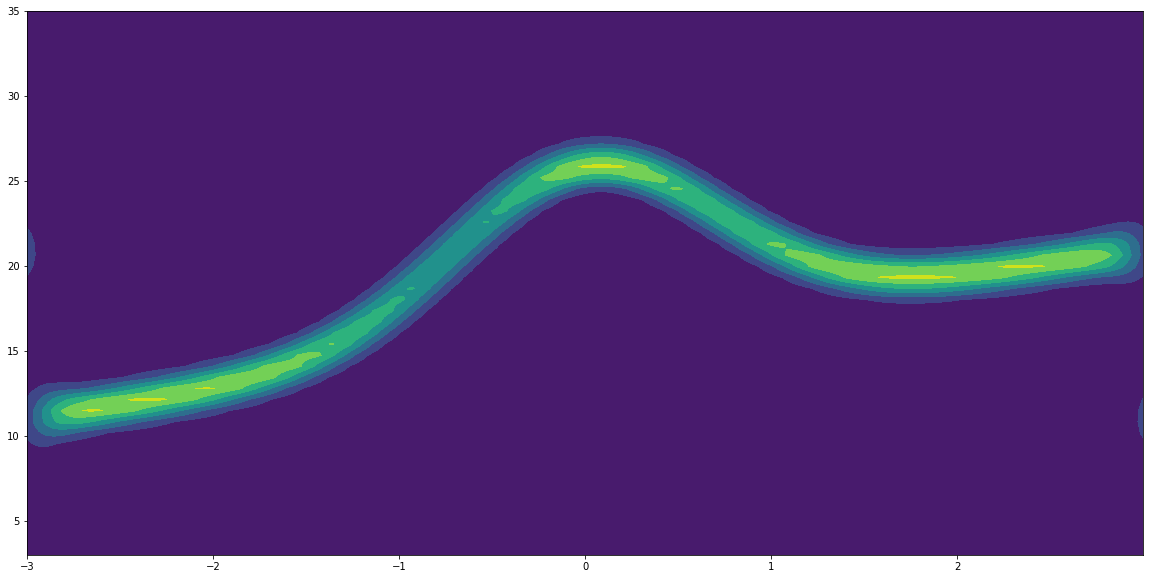

In [ ]:
plt.figure(figsize=(20, 10))
plt.contourf(time, freqs, tf)
plt.show()

# Task 6

Загружаем сигнал активности мозга

In [ ]:
annots = loadmat("Lab5_Data.mat")

In [ ]:
time = annots["timevec"][0]
sig = annots["data"][0]

n_points = len(time)

Выводим загруженный сигнал

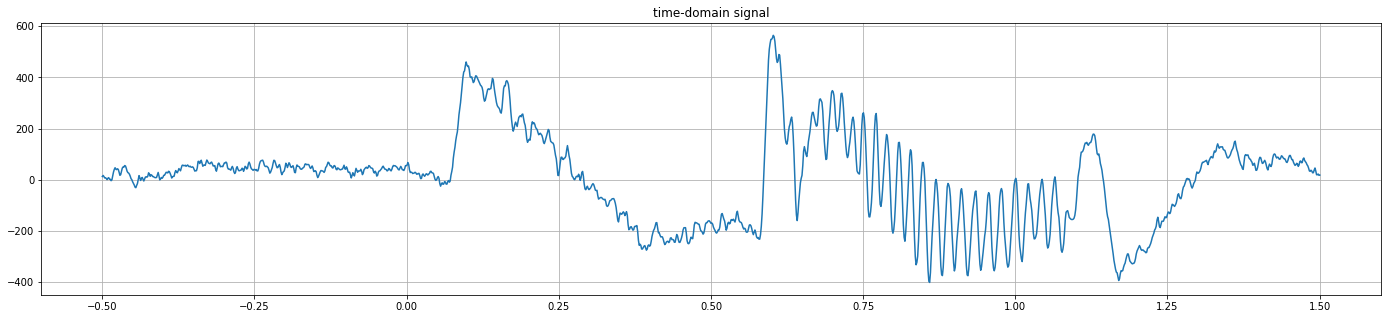

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(24, 5))

draw_graphic(time, sig, ax1, grid=True, title="time-domain signal")

plt.show()

Задаем параметры создаваемого семейства вейвлетов Морле

In [ ]:
n_freqs = 100
freqs = np.linspace(8, 70, n_freqs)
fwhm = 0.15

Создаем семейство вейвлетов Морле

In [ ]:
wavelets = np.zeros((n_freqs, n_points), dtype=np.complex128)

for i, freq in enumerate(freqs):
    morle = wavelet_morle(time, fwhm, freq)
    wavelets[i] += morle

Находим спектрограмму активности мозга

In [ ]:
yf_sig = fft.fft(sig)

tf = np.zeros((n_freqs, n_points), dtype=np.float32)

halfk = n_points // 2 + 1
halfk -= 350
for i, wavelet in enumerate(wavelets):
    yf_wave = fft.fft(wavelet)
    yf_wave /= yf_wave.max()

    conv_result = fft.ifft(yf_wave * yf_sig)
    conv_result = np.concatenate([conv_result[halfk:], conv_result[:halfk]])

    tf[i] += np.abs(conv_result)

Выводим полученную спектрограмму вместе с сигналом

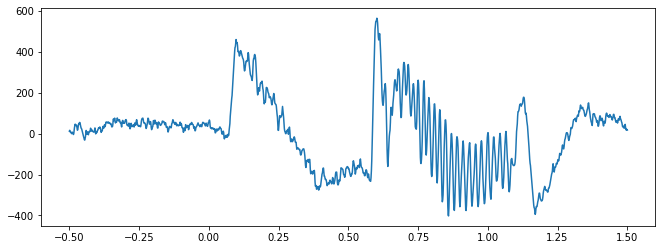

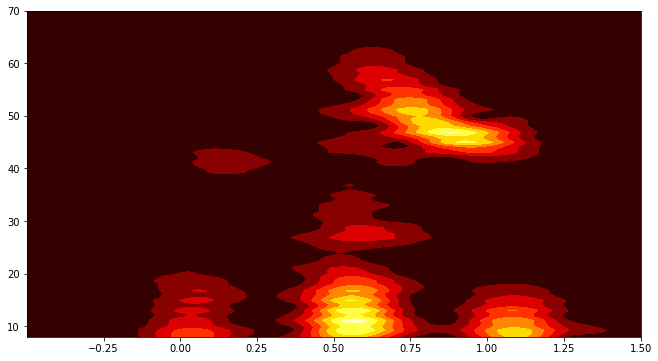

In [ ]:
plt.figure(figsize=(11, 4))
plt.plot(time, sig)
plt.show()

plt.figure(figsize=(11, 6))
plt.contourf(time, freqs, tf, cmap=cm.hot)
plt.show()